### Bayesian Data Analysis, 3rd ed
## Chapter 2, demo 2

Authors:
- Aki Vehtari <aki.vehtari@aalto.fi>
- Tuomas Sivula <tuomas.sivula@aalto.fi>

Probability of a girl birth given placenta previa (BDA3 p. 37).
Illustrate the effect of a prior. Comparison of posterior distributions with different parameter values for Beta prior distribution.

In [1]:
# import necessary packages

import numpy as np
from scipy.stats import beta

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# import from utilities
import os
util_path = '../utilities_and_data'  # provide path to utilities
util_path = os.path.abspath(util_path)
if util_path not in os.sys.path and os.path.exists(util_path):
    os.sys.path.insert(0, util_path)
import plot_tools

In [3]:
# edit default plot settings
plt.rc('font', size=12)

In [4]:
# grid
x = np.linspace(0.375, 0.525, 150)

# posterior with data (437,543) and uniform prior Beta(1,1)
au = 438
bu = 544
# calculate densities
pdu = beta.pdf(x, au, bu)

# compare 3 cases
# arrays of different priors:
# Beta(0.485*n, (1-0.485)*n), for n = 2, 20, 200
ap = np.array([0.485 * (2*10**i) for i in range(3)])
bp = np.array([(1-0.485) * (2*10**i) for i in range(3)])
# corresponding posteriors with data (437,543)
ai = 437 + ap
bi = 543 + bp
# calculate prior and posterior densities
pdp = beta.pdf(x, ap[:,np.newaxis], bp[:,np.newaxis])
pdi = beta.pdf(x, ai[:,np.newaxis], bi[:,np.newaxis])

The above two expressions uses numpy broadcasting inside the `beta.pdf` function. Arrays `ap` and `bp` have shape (3,) i.e. they are 1d arrays of length 3. Array `x` has shape (150,) and the output `pdp` is an array of shape (3,150).

Instead of using the `beta.pdf` function, we could have also calculated other arithmetics. For example `out = x + (ap * bp)[:,np.newaxis]` returns an array of shape (3,150), where each element `out[i,j] = x[j] + ap[i] * bp[i]`.

With broadcasting, unnecessary repetition is avoided, i.e. it is not necessary to create an array of `ap` repeated 150 times into the memory. More info can be found on the numpy documentation. Compare to `bsxfun` in Matlab.

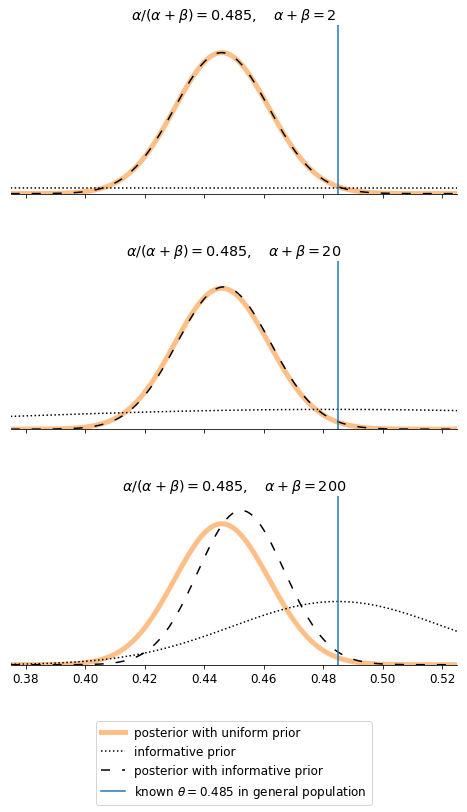

In [5]:
# plot 3 subplots
fig, axes = plt.subplots(
    nrows=3, ncols=1, sharex=True, sharey=True, figsize=(8, 12))
# leave space for the legend on bottom
# remove some space from the top
# add some space between them
fig.subplots_adjust(bottom=0.2, top=0.94, hspace=0.4)
for i, ax in enumerate(axes):
    # plot three precalculated densities
    post1, = ax.plot(x, pdu, color=plot_tools.lighten('C1'), linewidth=5)
    prior, = ax.plot(x, pdp[i], 'k:')
    post2, = ax.plot(x, pdi[i], color='k', dashes=(6, 8))
    # add vertical line
    known = axes[i].axvline(0.485, color='C0')
    # set the title for this subplot
    ax.set_title(
        r'$\alpha/(\alpha+\beta) = 0.485,\quad \alpha+\beta = {}$'
        .format(2*10**i)
    )
    # remove yticks
    ax.set_yticks(())
    # set axis spines (borders)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
# limit xaxis
axes[0].autoscale(axis='x', tight=True)
axes[0].set_ylim((0,30))
# add legend to the last subplot
axes[-1].legend(
    (post1, prior, post2, known),
    ( 'posterior with uniform prior',
      'informative prior',
      'posterior with informative prior',
     r'known $\theta=0.485$ in general population'),
    loc='upper center',
    bbox_to_anchor=(0.5, -0.3)
);